In [1]:
import os
import pickle
from datetime import datetime, timedelta
from tqdm import tqdm
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from shapely.geometry import LineString

In [2]:
geo = pd.read_csv('../../traj_gen_exp_bj/data/BJ_Taxi/cleaned-data/roadmap.cleaned.geo')
train_traj = pd.read_csv('../../traj_gen_exp_bj/data/BJ_Taxi/cleaned-data/new_train.cleaned.csv')

geometry_list = []
for _, row in geo.iterrows():
    coord = eval(row['coordinates'])
    coord = LineString(coord)
    geometry_list.append(coord)

In [3]:
visit_cnt_list_dict = dict()

real_visit_cnt_list = np.zeros(len(geo), dtype=np.int64)
traj_cnt = 0
for i in tqdm(range(len(train_traj)), total=len(train_traj)):
    rid_list = eval(train_traj.loc[i, 'rid_list'])
    for rid in rid_list:
        real_visit_cnt_list[rid] += 1

visit_cnt_list_dict['Real'] = real_visit_cnt_list

100%|██████████| 629380/629380 [00:26<00:00, 24078.81it/s]


In [4]:
data_path = {
    'Dijkstra': './gene/shortest_path',
    'DiffTraj': './gene/DiffTraj/',
    'Ours': './gene/Ours',
}

for name, path in data_path.items():
    traj_cnt = 0
    visit_cnt_list = np.zeros(len(geo), dtype=np.int64)

    for file_name in os.listdir(path):
        traj = pd.read_csv(os.path.join(path, file_name))
        
        for i in range(len(traj)):
            rid_list = eval(traj.loc[i, 'rid_list'])
            for rid in rid_list:
                visit_cnt_list[rid] += 1
            traj_cnt += 1

    visit_cnt_list_dict[name] = visit_cnt_list

In [ ]:
data = ({'geometry': geometry_list}) | visit_cnt_list_dict
roads = gpd.GeoDataFrame(data, crs="EPSG:4326")

os.makedirs('./BJ_Taxi_heatmap_without_locator', exist_ok=True)
fig, axes = plt.subplots(1, 4, figsize=(4 * 4, 4.25 * 1))

for i, name in enumerate(['Dijkstra', 'DiffTraj', 'Ours', 'Real']):
    roads.plot(column=name, cmap='Reds', linewidth=1.0, ax=axes[i])

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

axes[0].set_xlabel('(a) Dijkstra', fontsize=28)
axes[1].set_xlabel('(b) DiffTraj', fontsize=28)
axes[2].set_xlabel('(c) Ours', fontsize=28)
axes[3].set_xlabel('(d) Real', fontsize=28)

plt.tight_layout()
plt.savefig(os.path.join('./BJ_Taxi_heatmap_without_locator', 'all.pdf'), format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
data = ({'geometry': geometry_list}) | visit_cnt_list_dict
roads = gpd.GeoDataFrame(data, crs="EPSG:4326")

os.makedirs('./BJ_Taxi_heatmap_without_locator', exist_ok=True)
for name in visit_cnt_list_dict.keys():
    fig, ax = plt.subplots(1, 1)
    roads.plot(column=name, cmap='Reds', linewidth=1.0, ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    plt.tight_layout()
    plt.savefig(os.path.join('./BJ_Taxi_heatmap_without_locator', f'{name}.pdf'), format='pdf', bbox_inches='tight')
    print(name)
    plt.show()

Real


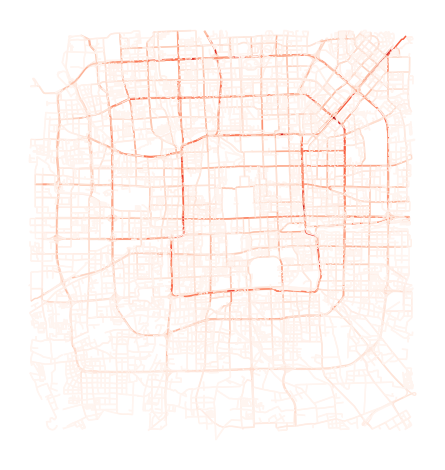

Dijkstra


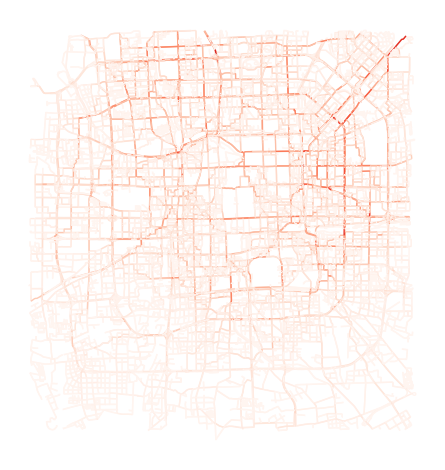

DiffTraj


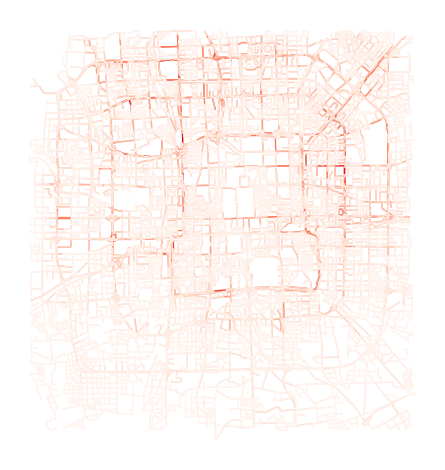

Ours


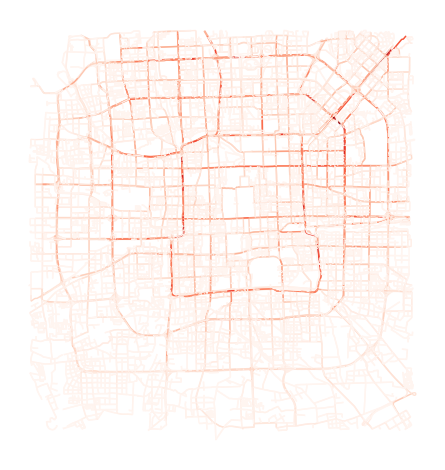

In [5]:
data = ({'geometry': geometry_list}) | visit_cnt_list_dict
roads = gpd.GeoDataFrame(data, crs="EPSG:4326")

os.makedirs('./BJ_Taxi_heatmap_without_locator', exist_ok=True)
for name in visit_cnt_list_dict.keys():
    fig, ax = plt.subplots(1, 1)
    roads.plot(column=name, cmap='Reds', linewidth=1.0, ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    plt.tight_layout()
    plt.savefig(os.path.join('./BJ_Taxi_heatmap_without_locator', f'{name}.png'), format='png', bbox_inches='tight', dpi=300)
    print(name)
    plt.show()